# Processing Dataset

In [ ]:
# Download dataset
!wget https://github.com/pramuditab/license-plate-number-dataset/raw/main/CNN%20letter%20Dataset.zip

--2022-05-24 13:29:21--  https://github.com/pramuditab/license-plate-number-dataset/raw/main/CNN%20letter%20Dataset.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pramuditab/license-plate-number-dataset/main/CNN%20letter%20Dataset.zip [following]
--2022-05-24 13:29:21--  https://raw.githubusercontent.com/pramuditab/license-plate-number-dataset/main/CNN%20letter%20Dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53865076 (51M) [application/zip]
Saving to: ‘CNN letter Dataset.zip’

CNN letter Dataset. 100%[===================>]  51.37M   146MB/s    in 0.4s    

2022-05-24 13:29

In [ ]:
import zipfile

# Extract the archive
local_zip = './CNN letter Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/CNN letter Dataset')
zip_ref.close()

In [ ]:
import os

base_dir = 'tmp/CNN letter Dataset/CNN letter Dataset'

class_0_dir = os.path.join(base_dir, '0')
class_1_dir = os.path.join(base_dir, '1')
class_O_dir = os.path.join(base_dir, 'O')

print('total training 0 images:', len(os.listdir(class_0_dir)))
print('total training 1 images:', len(os.listdir(class_1_dir)))
print('total training O images:', len(os.listdir(class_O_dir)))

class_0_files = os.listdir(class_0_dir)
print(class_0_files[:10])

class_1_files = os.listdir(class_1_dir)
print(class_1_files[:10])

class_O_files = os.listdir(class_O_dir)
print(class_O_files[:10])

total training 0 images: 1030
total training 1 images: 1030
total training O images: 32
['aug17548_7.jpg', 'aug17514_3.jpg', 'aug17878_7.jpg', 'aug17979_8.jpg', 'aug17749_8.jpg', 'aug18376_5.jpg', 'aug17488_7.jpg', 'aug17811_0.jpg', 'aug17618_7.jpg', 'aug17984_3.jpg']
['aug19342_1.jpg', 'aug8077_16.jpg', 'aug18870_9.jpg', 'aug18694_3.jpg', 'aug19393_2.jpg', 'aug18612_1.jpg', 'aug19377_6.jpg', 'aug18842_1.jpg', 'aug19104_3.jpg', 'aug19111_0.jpg']
['2022-05-24 19_03_35-B1809SOF.jpg _ vepay-license-plate-detection - 2022-05-20 10_54am Version 3.png', '2022-05-24 18_40_25-images-license-plate-only - Google Drive.png', '2022-05-24 19_03_56-B1925BOF.jpg _ vepay-license-plate-detection - 2022-05-20 10_54am Version 3.png', '2022-05-24 18_42_23-images-license-plate-only - Google Drive.png', '2022-05-24 19_04_32-B2113SOY.jpg _ vepay-license-plate-detection - 2022-05-20 10_54am Version 3.png', '2022-05-24 18_39_01-images-license-plate-only - Google Drive.png', '2022-05-24 19_02_55-B1635NOZ.jpg _ 

# Model

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(75, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(36, activation='softmax')
])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 17, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 21, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 10, 64)        0

In [ ]:
# Set the training parameters
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Image Preprocessing

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "tmp/CNN letter Dataset/CNN letter Dataset"
training_datagen = ImageDataGenerator(rescale=1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.1)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(75,100),
	class_mode='sparse',
  batch_size=62,
  subset='training'
)

validation_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(75,100),
	class_mode='sparse',
  batch_size=62,
  subset='validation'
)

Found 31979 images belonging to 36 classes.
Found 3553 images belonging to 36 classes.


# Training Model

In [ ]:
# Train the model
history = model.fit(train_generator, epochs=10, validation_data = validation_generator, verbose = 1)

Epoch 1/10
516/516 [==============================] - 431s 833ms/step - loss: 2.8086 - accuracy: 0.2041 - val_loss: 2.1822 - val_accuracy: 0.3642
Epoch 2/10
516/516 [==============================] - 428s 829ms/step - loss: 1.9321 - accuracy: 0.4279 - val_loss: 1.6341 - val_accuracy: 0.5066
Epoch 3/10
516/516 [==============================] - 423s 820ms/step - loss: 1.5176 - accuracy: 0.5446 - val_loss: 1.2912 - val_accuracy: 0.6057
Epoch 4/10
516/516 [==============================] - 418s 809ms/step - loss: 1.2227 - accuracy: 0.6349 - val_loss: 1.0043 - val_accuracy: 0.7000
Epoch 5/10
516/516 [==============================] - 418s 809ms/step - loss: 1.0245 - accuracy: 0.6936 - val_loss: 0.9300 - val_accuracy: 0.7115
Epoch 6/10
516/516 [==============================] - 419s 811ms/step - loss: 0.8963 - accuracy: 0.7296 - val_loss: 0.8782 - val_accuracy: 0.7171
Epoch 7/10
516/516 [==============================] - 421s 816ms/step - loss: 0.7925 - accuracy: 0.7629 - val_loss: 0.7252 -

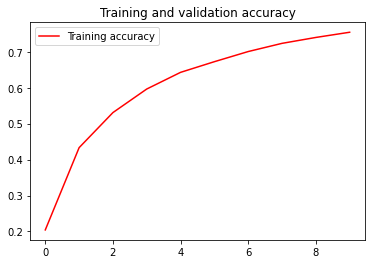

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
#val_acc = history.history['val_accuracy']
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
#plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
model.save("model_char_recognition.h5")

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(75, 100))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  result = int(np.argmax(classes))
  dictionary = {0:'0', 1:'1', 2 :'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9', 10:'A',
    11:'B', 12:'C', 13:'D', 14:'E', 15:'F', 16:'G', 17:'H', 18:'I', 19:'J', 20:'K',
    21:'L', 22:'M', 23:'N', 24:'O', 25:'P', 26:'Q', 27:'R', 28:'S', 29:'T',
    30:'U', 31:'V', 32:'W', 33:'X', 34:'Y', 35:'Z'}
  print(dictionary[result])

Saving aug7501_0.jpg to aug7501_0.jpg
aug7501_0.jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
9
